In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
df= pd.read_csv("https://raw.githubusercontent.com/BartekGRK/Python_data_analysis/master/Seaborn_and_Logistic_Regression/Ecommerce_Customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

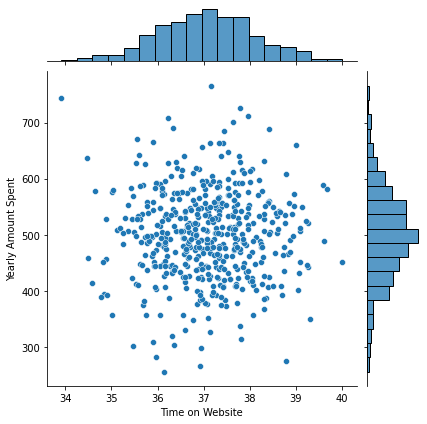

In [10]:
sns.jointplot(x = 'Time on Website', y ='Yearly Amount Spent', data = df)

**Created a jointplot to compare the Time on Website and Yearly Amount Spent columns. **

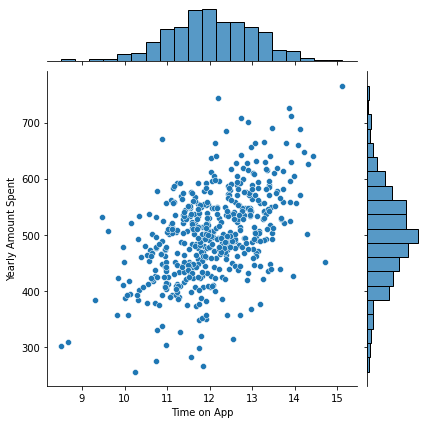

In [11]:
sns.jointplot(x = 'Time on App', y ='Yearly Amount Spent', data = df)


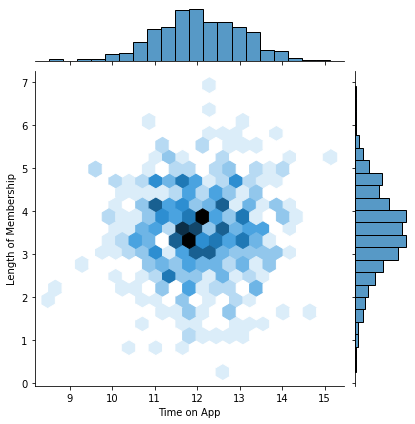

In [12]:
sns.jointplot(x = 'Time on App', y ='Length of Membership',kind = 'hex', data = df)


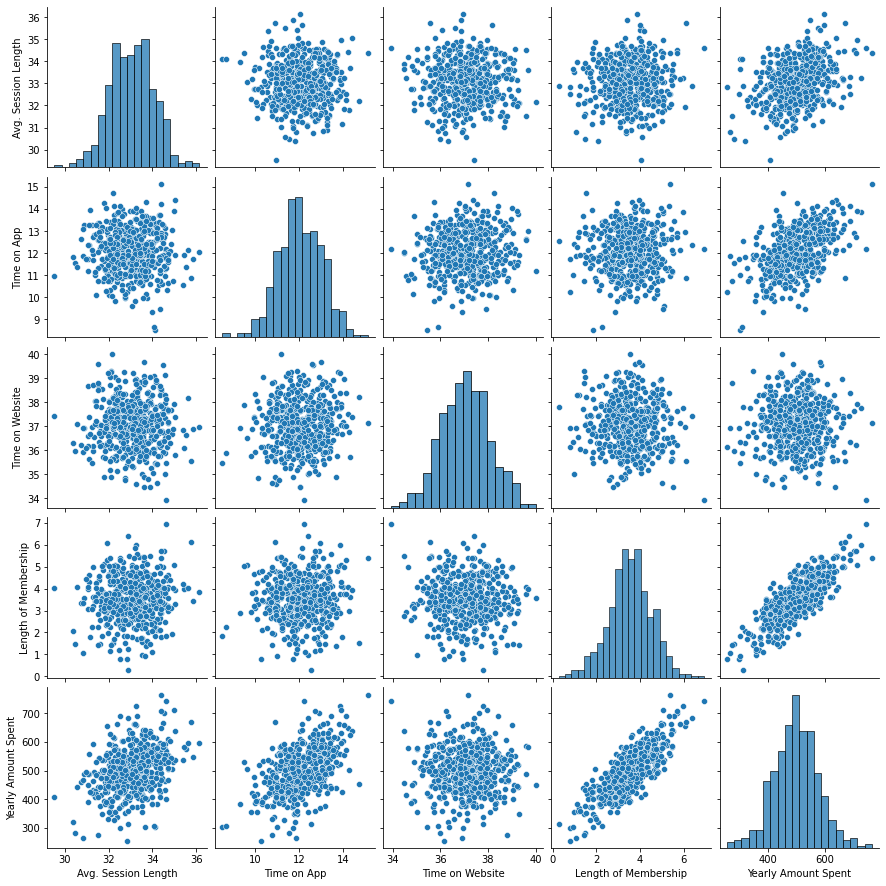

In [13]:
sns.pairplot(df)

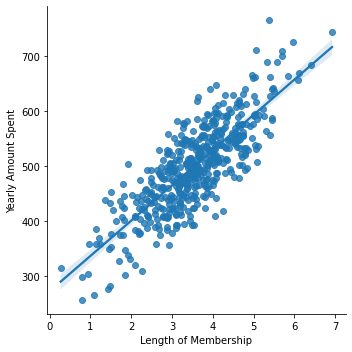

In [14]:
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = df)

## Training and Testing Data

In [15]:
X = df [['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']].values
y = df[['Yearly Amount Spent']]


**Use model_selection.train_test_split from sklearn to split the data into training and testing sets.**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

## Training the Model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Print out the coefficients of the model**

In [20]:
model.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

## Predicting Test Data

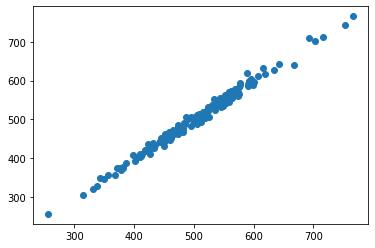

In [21]:
y_pred = model.predict(X_test)
plt.scatter(y_pred, y_test)

## Evaluating the Model

In [22]:
from sklearn import metrics

In [23]:
# MAE
metrics.mean_absolute_error(y_test, y_pred)

7.22814865343086

In [24]:
# MSE
metrics.mean_squared_error(y_test, y_pred)

79.81305165097505

In [25]:
# RMSE
metrics.mean_squared_error(y_test, y_pred, squared=False)

8.933815066978667

**Calculated the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

##Residuals


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


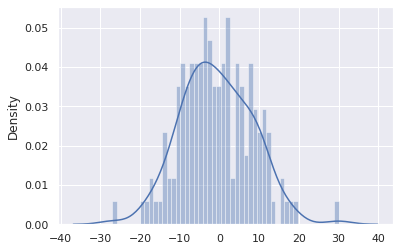

In [26]:
sns.set_theme()
sns.distplot(y_test-y_pred, bins=50)

##Conclusion

In [27]:
coef = model.coef_

In [28]:
dfc = pd.DataFrame( data=np.reshape(coef,4)[:,None], index=['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership'], columns= ['Coefficient'])

In [29]:
dfc

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Based on this data company should focus on mobile app development.

# Part 2 Logistic Regression Project

In [30]:
df= pd.read_csv("https://raw.githubusercontent.com/BartekGRK/Python_data_analysis/master/Seaborn_and_Logistic_Regression/advertising.csv")

In [31]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## Exploratory Data Analysis

(array([12.,  6., 32., 21., 27., 70., 48., 87., 60., 38., 82., 39., 86.,
        37., 30., 68., 26., 44., 30., 18., 29., 18., 32., 15., 10., 16.,
         2., 10.,  2.,  5.]),
 array([19. , 20.4, 21.8, 23.2, 24.6, 26. , 27.4, 28.8, 30.2, 31.6, 33. ,
        34.4, 35.8, 37.2, 38.6, 40. , 41.4, 42.8, 44.2, 45.6, 47. , 48.4,
        49.8, 51.2, 52.6, 54. , 55.4, 56.8, 58.2, 59.6, 61. ]),
 <a list of 30 Patch objects>)

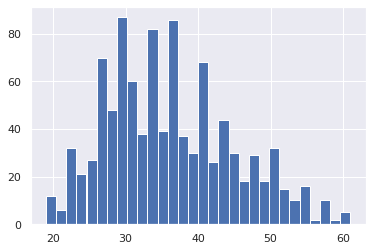

In [33]:
plt.hist(df.Age,bins=30)

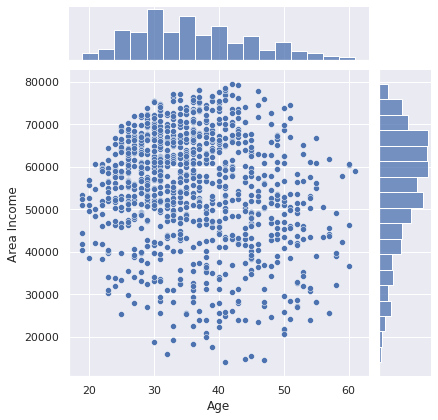

In [34]:
sns.jointplot(x = "Age", y = "Area Income", data=df)

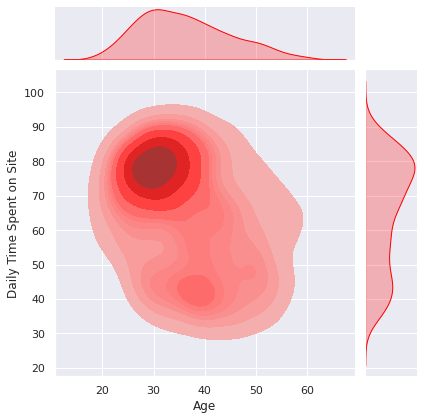

In [35]:
sns.jointplot(x = "Age", y = "Daily Time Spent on Site", data=df, color = 'red', kind='kde', fill=True)

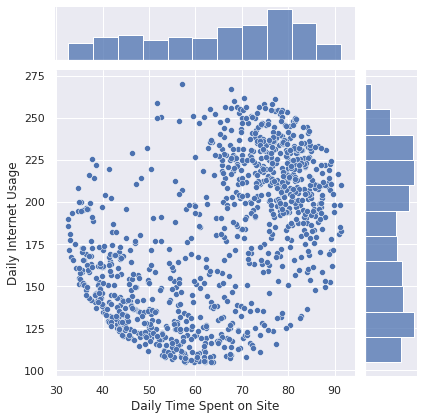

In [36]:
sns.jointplot(x = "Daily Time Spent on Site", y = "Daily Internet Usage", data=df)

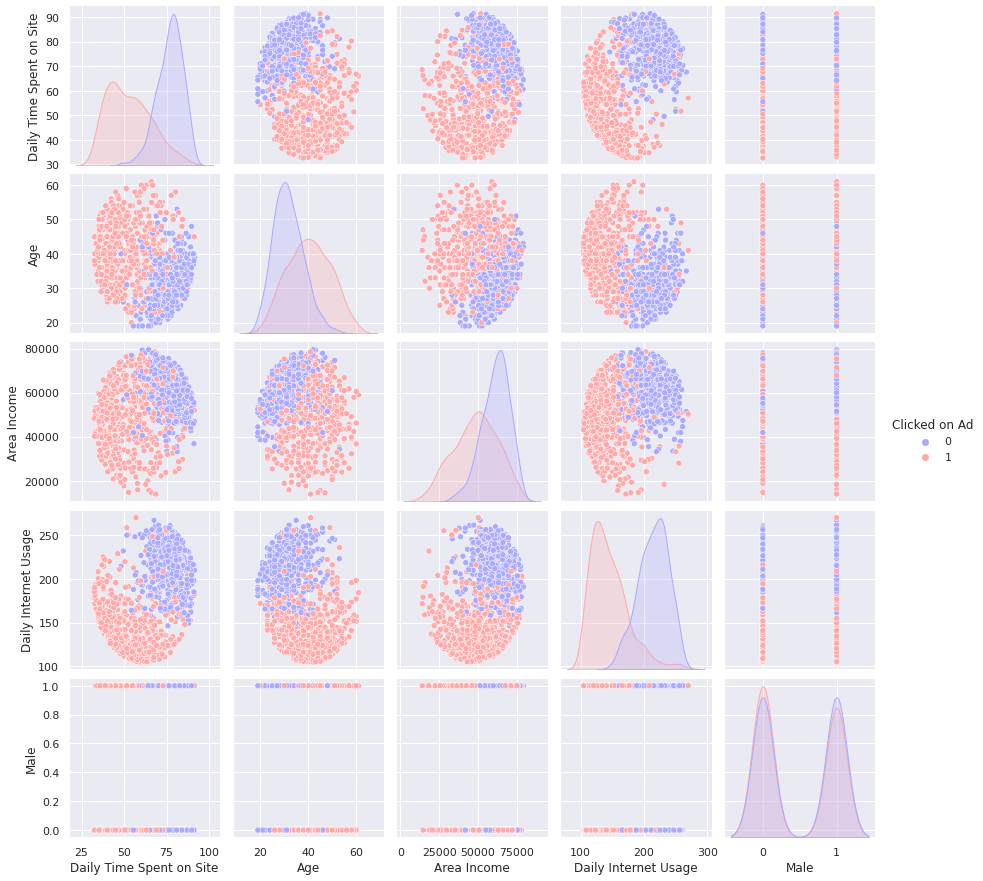

In [37]:
sns.pairplot(data=df, hue = "Clicked on Ad", palette ='bwr' )

## Logistic Regression

In [38]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', ]]
y = df['Clicked on Ad']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=42)

### Predictions and Evaluations

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [42]:
y_pred = model.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       174
           1       0.94      0.90      0.92       176

    accuracy                           0.92       350
   macro avg       0.92      0.92      0.92       350
weighted avg       0.92      0.92      0.92       350

